In [1]:
#Import all the necessary modules

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Qualitative_Bankruptcy.data.txt",delimiter=',',header=None,names=['Industrial Risk','Management Risk',' Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

In [3]:
df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


In [4]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
df.dtypes

Industrial Risk           object
Management Risk           object
 Financial Flexibility    object
Credibility               object
Competitiveness           object
Operating Risk            object
Class                     object
dtype: object

In [6]:
df.shape

(250, 7)

In [7]:
df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [8]:
df.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [9]:
var=['Industrial Risk','Management Risk',' Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
from sklearn.preprocessing import LabelEncoder
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,df)   
     

In [10]:
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


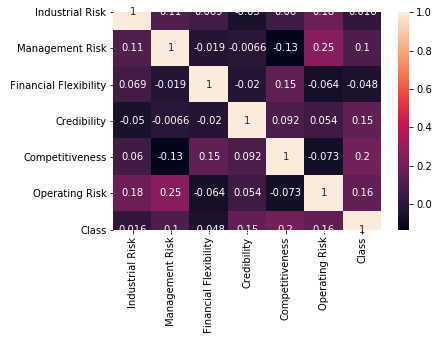

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


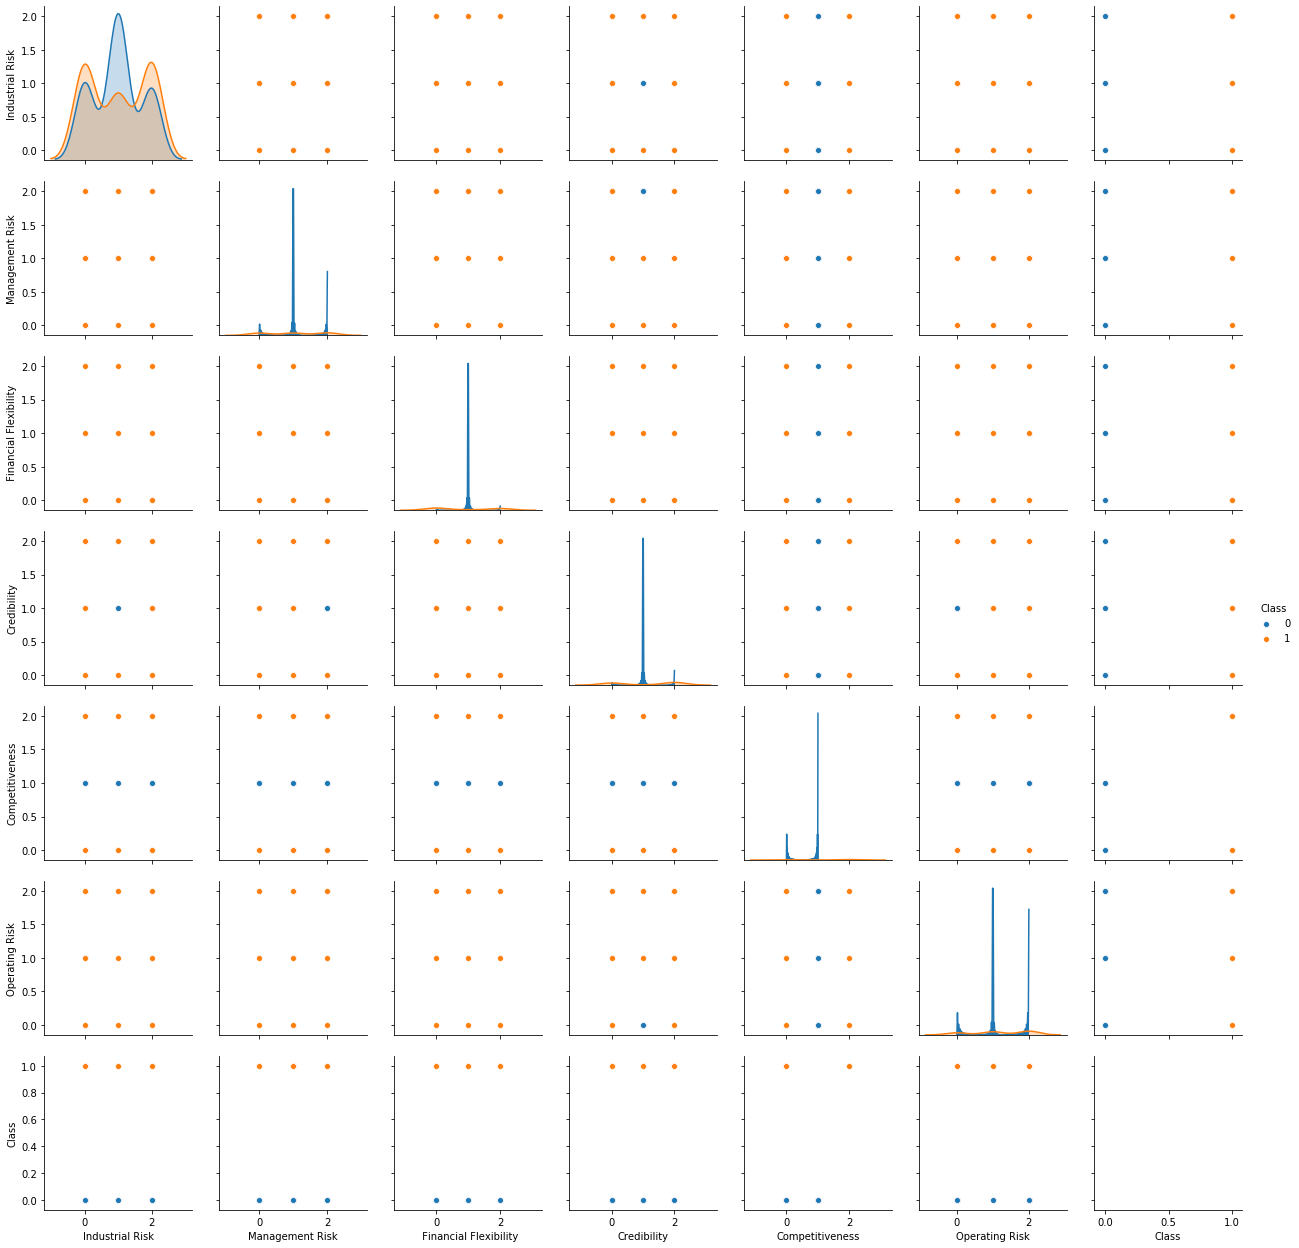

In [12]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='Class')

In [13]:
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

X= df.drop('Class',axis=1)

In [14]:
X.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [15]:
Y=df.Class.values.reshape(-1,1)

In [16]:
Y.shape

(250, 1)

In [17]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)


X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200, 1)
X_test shape: (50, 1)


In [19]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00401606  0.11050499  0.06896979 -0.05063474  0.06067116  0.17828624]
 [ 0.11050499  1.00401606 -0.01907523 -0.00663532 -0.13270519  0.25487081]
 [ 0.06896979 -0.01907523  1.00401606 -0.02020518  0.1506388  -0.0647138 ]
 [-0.05063474 -0.00663532 -0.02020518  1.00401606  0.0925247   0.0543217 ]
 [ 0.06067116 -0.13270519  0.1506388   0.0925247   1.00401606 -0.07332432]
 [ 0.17828624  0.25487081 -0.0647138   0.0543217  -0.07332432  1.00401606]]


In [20]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.3543949   0.52548912 -0.22212592 -0.50344175  0.31668326 -0.44179592]
 [ 0.59625222  0.04014682  0.0049758   0.44961125  0.5341991   0.39411648]
 [-0.18515502  0.57797176 -0.26992841  0.67139151 -0.21756866 -0.24637824]
 [-0.03768735  0.12680022  0.88676713  0.15444354  0.17274349 -0.37742854]
 [-0.32900354  0.58968423  0.21525441 -0.25452456  0.05116711  0.65596791]
 [ 0.61232466  0.15618028  0.21232891 -0.07066827 -0.73112825  0.12664965]]

 Eigen Values 
%s [1.41100575 1.1971697  1.05827906 0.88458153 0.71361059 0.75944974]


In [21]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.411005753989153, array([ 0.3543949 ,  0.59625222, -0.18515502, -0.03768735, -0.32900354,
        0.61232466])), (1.1971697047979128, array([0.52548912, 0.04014682, 0.57797176, 0.12680022, 0.58968423,
       0.15618028])), (1.0582790615875515, array([-0.22212592,  0.0049758 , -0.26992841,  0.88676713,  0.21525441,
        0.21232891])), (0.884581530359125, array([-0.50344175,  0.44961125,  0.67139151,  0.15444354, -0.25452456,
       -0.07066827])), (0.7594497443636661, array([-0.44179592,  0.39411648, -0.24637824, -0.37742854,  0.65596791,
        0.12664965])), (0.713610590444758, array([ 0.31668326,  0.5341991 , -0.21756866,  0.17274349,  0.05116711,
       -0.73112825]))]
Eigenvalues in descending order: 
[1.411005753989153, 1.1971697047979128, 1.0582790615875515, 0.884581530359125, 0.7594497443636661, 0.713610590444758]


In [22]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)  
cum_var_exp

array([0.23422696, 0.43295713, 0.60863145, 0.75547198, 0.88154064,
       1.        ])

In [23]:
pca=PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pcacomponents=pca.components_
df_comp=pd.DataFrame(pcacomponents,columns= X.columns)
df_comp

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,-0.601539,-0.506383,0.066179,0.094202,0.223138,-0.564520
1,-0.498788,0.158517,-0.445407,-0.253452,-0.680285,0.025899
2,-0.236829,0.139127,-0.221075,0.898012,0.026208,0.261856
3,-0.444947,0.493902,0.738597,-0.041013,-0.023110,0.101694
4,-0.342775,0.174415,-0.372527,-0.338496,0.676298,0.375964
5,-0.133420,-0.651715,0.253096,-0.064808,-0.169769,0.678519


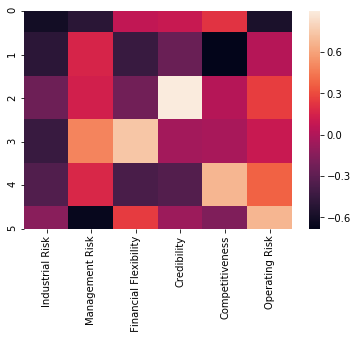

In [25]:
sns.heatmap(df_comp)

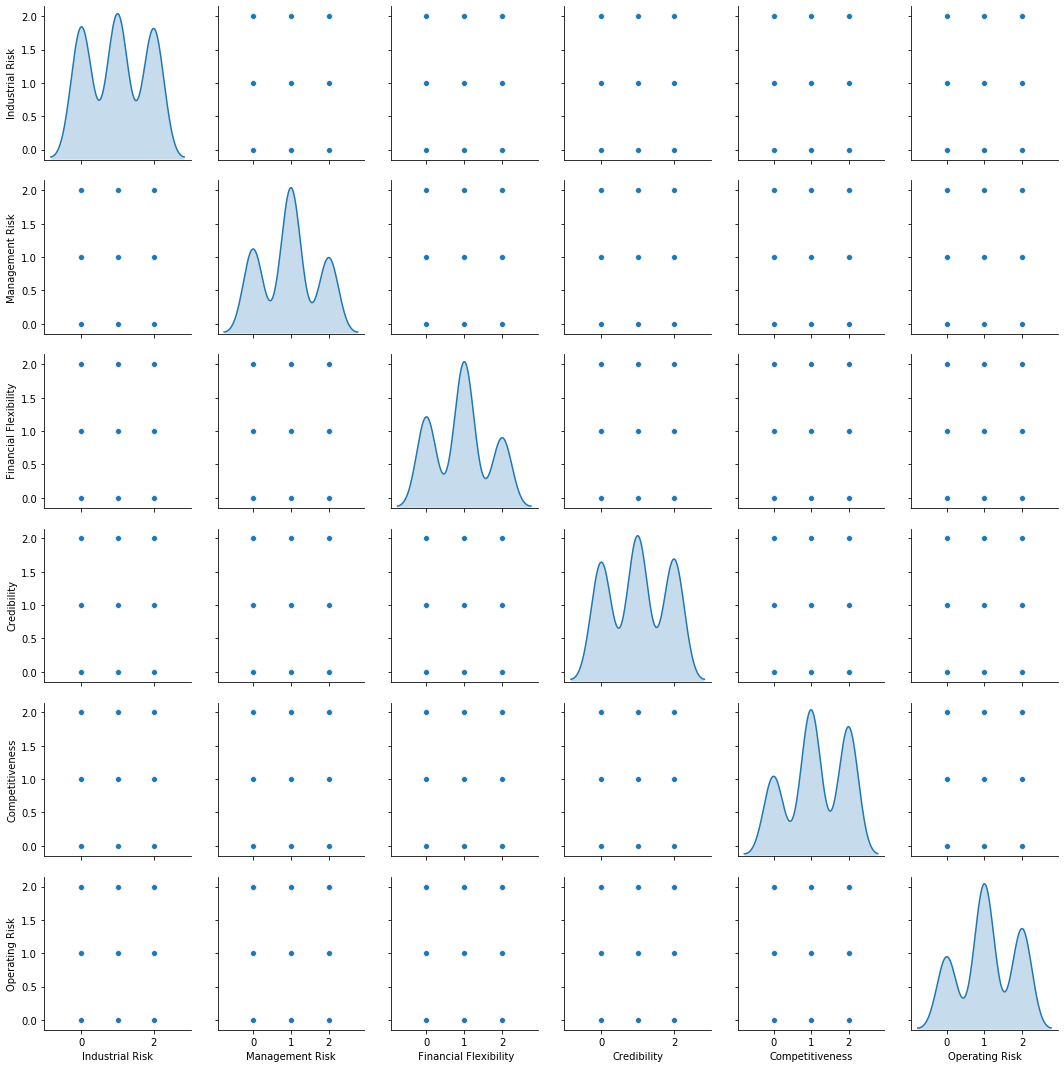

In [27]:
import seaborn as sns
sns.pairplot(X,diag_kind='kde')

In [28]:
df_scaled = X.apply(zscore)

In [29]:
df_scaled.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,1.251112,1.421192,-1.293228,-1.276117,-1.512091,1.24540
1,0.004985,0.038709,-1.293228,-1.276117,-1.512091,-0.12017
2,-1.241143,-1.343773,-1.293228,-1.276117,-1.512091,-1.48574
3,1.251112,1.421192,1.481939,1.255861,1.140700,1.24540
4,0.004985,0.038709,1.481939,1.255861,1.140700,-0.12017


In [30]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1500.000000
1,2,1277.365329
2,3,1130.911225
3,4,1014.623287
4,5,927.771459
5,6,873.184994
6,7,811.004296
7,8,756.649117
8,9,701.886581
9,10,668.002277


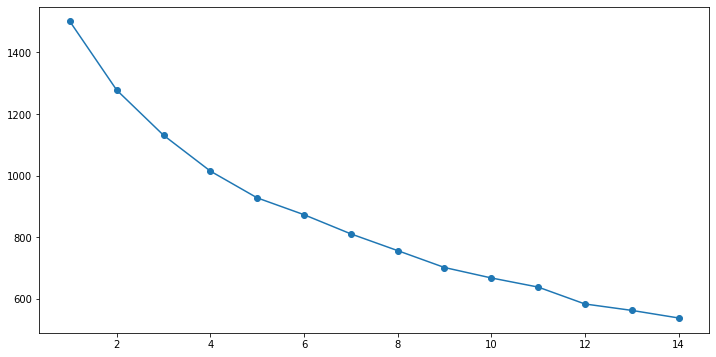

In [31]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [32]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [33]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [34]:
centroids=kmeans.cluster_centers_

In [35]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [36]:
centroid_df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,0.582138,-0.063158,0.415691,0.456289,0.554294,0.426058
1,-0.593157,-0.334561,0.038852,-0.275986,-0.039792,-0.789299
2,0.072955,0.717382,-0.788652,-0.286344,-0.885067,0.699172


In [37]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [38]:
# Joining the label dataframe with the bank data frame to create bank_df_labeled. 
Bank_df_labeled = df_scaled.join(df_labels)

In [39]:
Bank_clusters = Bank_df_labeled.groupby(['labels'])
#Bank_clusters = Bank_data_attr.groupby(['clusters'])
df0=Bank_clusters.get_group(0)
df1=Bank_clusters.get_group(1)
df2=Bank_clusters.get_group(2)


In [40]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [41]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [42]:
tot_I=I0+I1+I2
print(tot_I)

1130.9112253129472


In [43]:
kmeans.inertia_

1130.9112253129472

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.13942765449937286


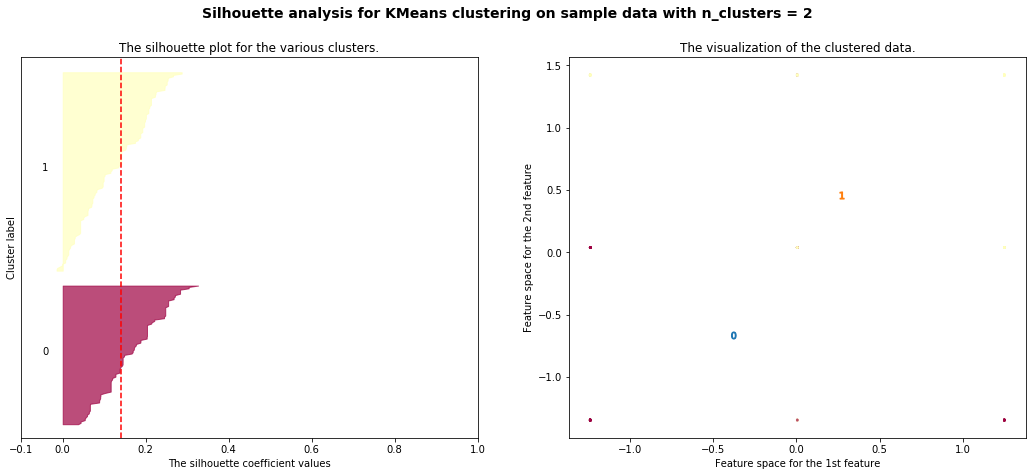

For n_clusters = 3 The average silhouette_score is : 0.1483888773370056


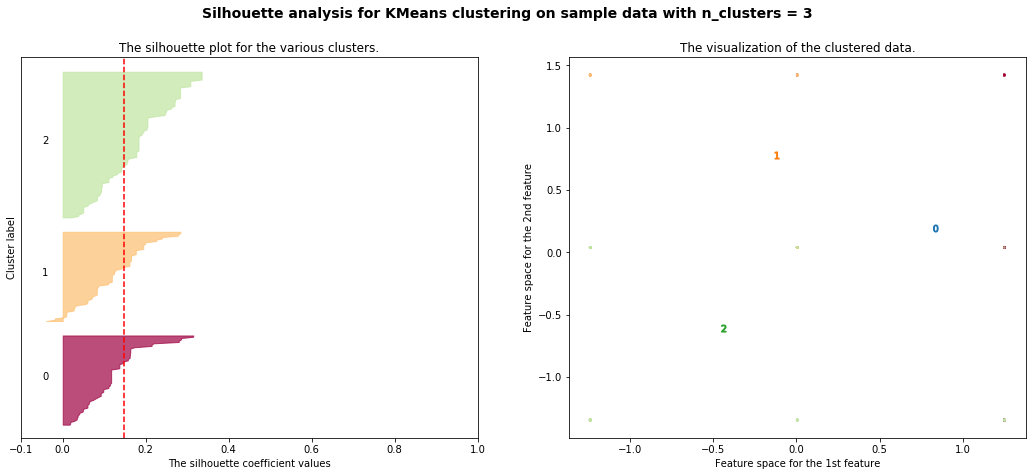

For n_clusters = 4 The average silhouette_score is : 0.1561367675726945


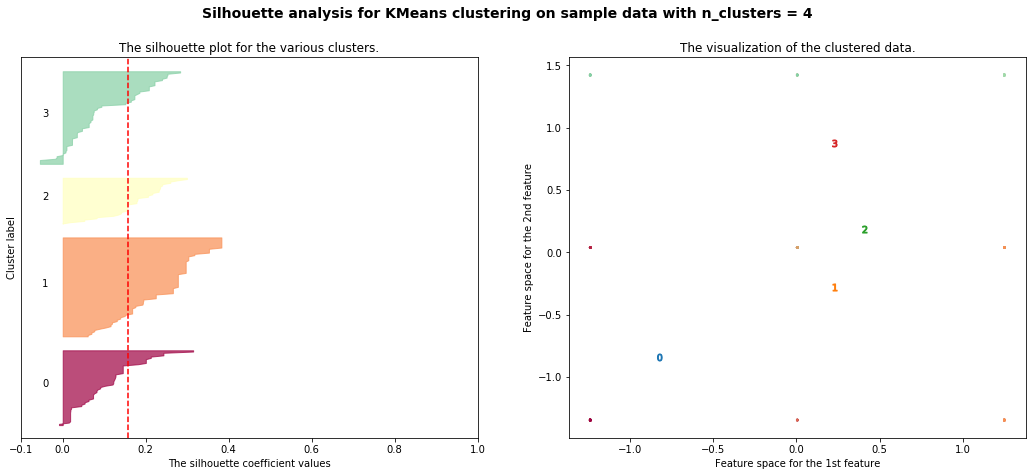

For n_clusters = 5 The average silhouette_score is : 0.17268597475248346


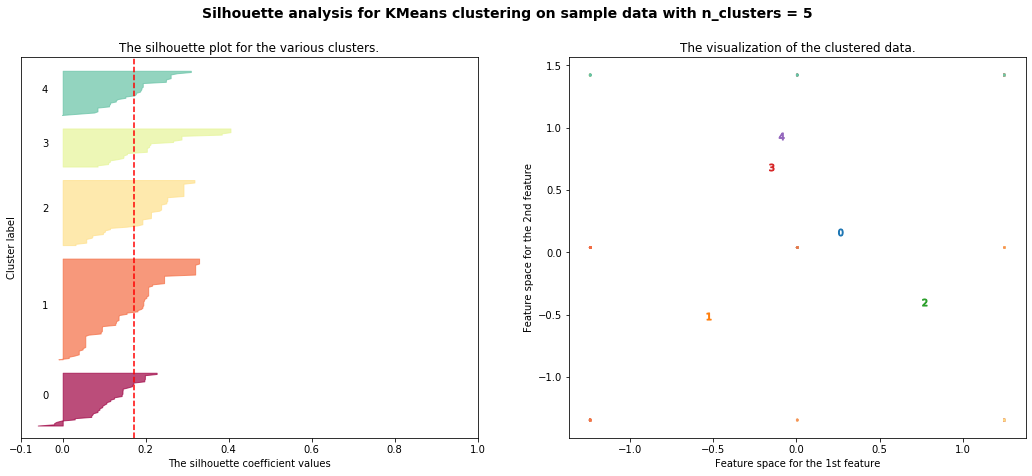

For n_clusters = 6 The average silhouette_score is : 0.18172909238040885


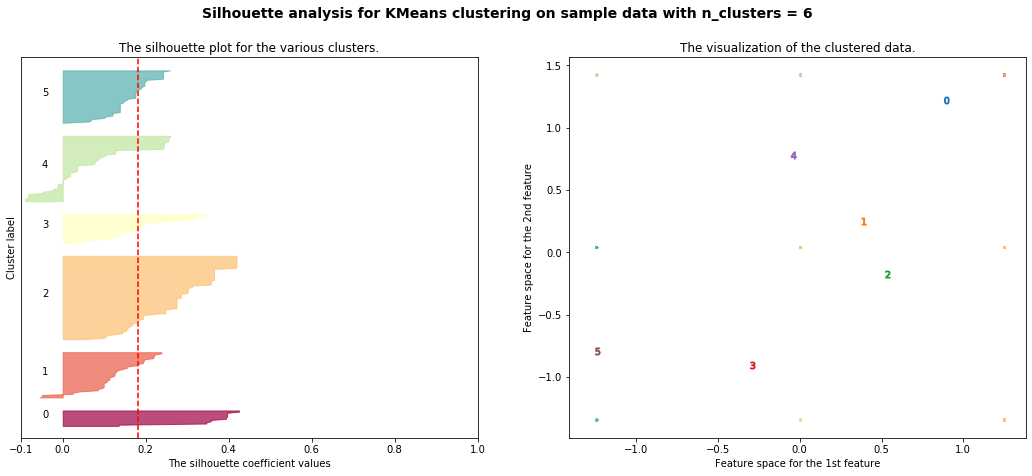

In [44]:
## from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [45]:
from sklearn.model_selection import cross_val_score, KFold

Y=df['Class']
X=df.drop('Class',axis=1)
kf = KFold(n_splits=10,random_state=1)
print(X.head())
print(Y.head())


   Industrial Risk  Management Risk   Financial Flexibility  Credibility  \
0                2                2                       0            0   
1                1                1                       0            0   
2                0                0                       0            0   
3                2                2                       2            2   
4                1                1                       2            2   

   Competitiveness  Operating Risk  
0                0               2  
1                0               1  
2                0               0  
3                2               2  
4                2               1  
0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int32


In [46]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(C = 30, gamma = 0.01)
svc.fit(X, Y) 

acc_SVM = cross_val_score(svc,X,Y,cv=kf)
print(acc_SVM.mean())


0.944


In [47]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
NN = NearestCentroid()
NN.fit(X, Y)
acc_NN = cross_val_score(NN,X,Y,cv=kf)
print(acc_NN.mean())

0.644


In [49]:
predicted_labels = NN.predict(X_test)

In [51]:
print(metrics.confusion_matrix(Y_test, predicted_labels))

[[19  2]
 [ 8 21]]
